<a href="https://colab.research.google.com/github/HafidzSetyawan/PCVK_MuhammadHafidzSetyawan_2024/blob/main/Praktikum_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : MUHAMMAD HAFIDZ SETYAWAN

NIM : 244107027013

MATKUL : PENGOLAHAN CITRA DAN VISI KOMPUTER


In [1]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
def load_image(path):
    return cv2.imread(path)

lena = load_image('/content/drive/MyDrive/PCVK_2024/foto_hafidz.png')
lena_lc = load_image('/content/drive/MyDrive/PCVK_2024/kitten1.jpeg')

Tugas 3 : Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart


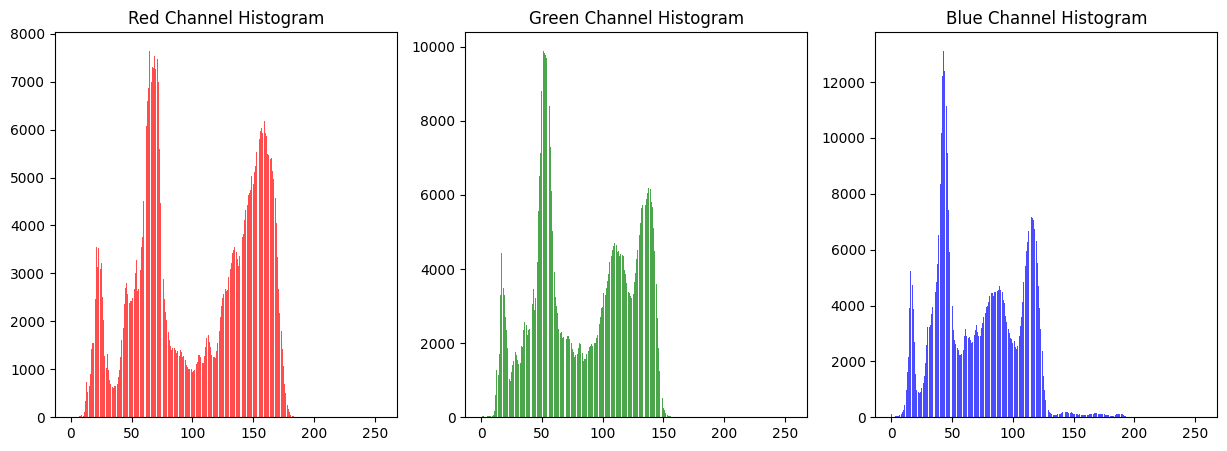

In [7]:
def create_histogram_manual(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hist_r = np.zeros(256)
    hist_g = np.zeros(256)
    hist_b = np.zeros(256)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist_r[image_rgb[i, j, 0]] += 1
            hist_g[image_rgb[i, j, 1]] += 1
            hist_b[image_rgb[i, j, 2]] += 1

    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.bar(range(256), hist_r, color='red', alpha=0.7)
    plt.title('Red Channel Histogram')
    plt.subplot(132)
    plt.bar(range(256), hist_g, color='green', alpha=0.7)
    plt.title('Green Channel Histogram')
    plt.subplot(133)
    plt.bar(range(256), hist_b, color='blue', alpha=0.7)
    plt.title('Blue Channel Histogram')
    plt.show()

print("Tugas 3 : Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart")
create_histogram_manual(lena)

Tugas 4 : Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?


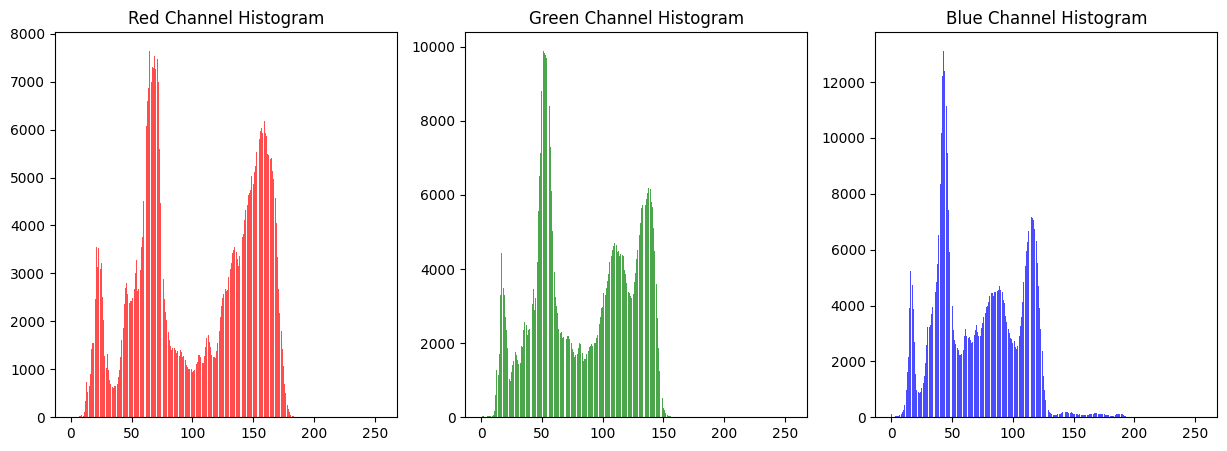

In [8]:
def create_histogram_numpy(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 5))
    for i, color in enumerate(['red', 'green', 'blue']):
        plt.subplot(1, 3, i+1)
        hist, bins = np.histogram(image_rgb[:,:,i].ravel(), 256, [0, 256])
        plt.bar(range(256), hist, color=color, alpha=0.7)
        plt.title(f'{color.capitalize()} Channel Histogram')
    plt.show()

print("Tugas 4 : Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?")
create_histogram_numpy(lena)

Tugas 5 :  Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


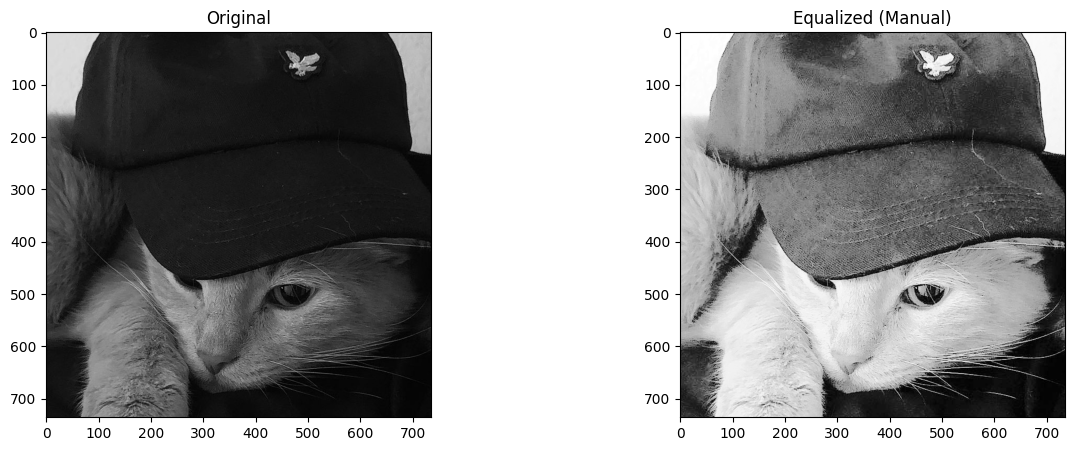

In [9]:
def histogram_equalization_manual(image):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    hist = np.zeros(256)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            hist[gray[i, j]] += 1

    cum_hist = np.cumsum(hist)

    cum_hist_normalized = cum_hist * 255 / cum_hist[-1]

    # Create lookup table
    lookup_table = np.round(cum_hist_normalized).astype('uint8')

    equalized = np.zeros_like(gray)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            equalized[i, j] = lookup_table[gray[i, j]]

    return equalized, gray

print("Tugas 5 :  Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)")
eq_manual, gray_manual = histogram_equalization_manual(lena_lc)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(gray_manual, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(eq_manual, cmap='gray')
plt.title('Equalized (Manual)')
plt.show()


Tugas 6 : Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?


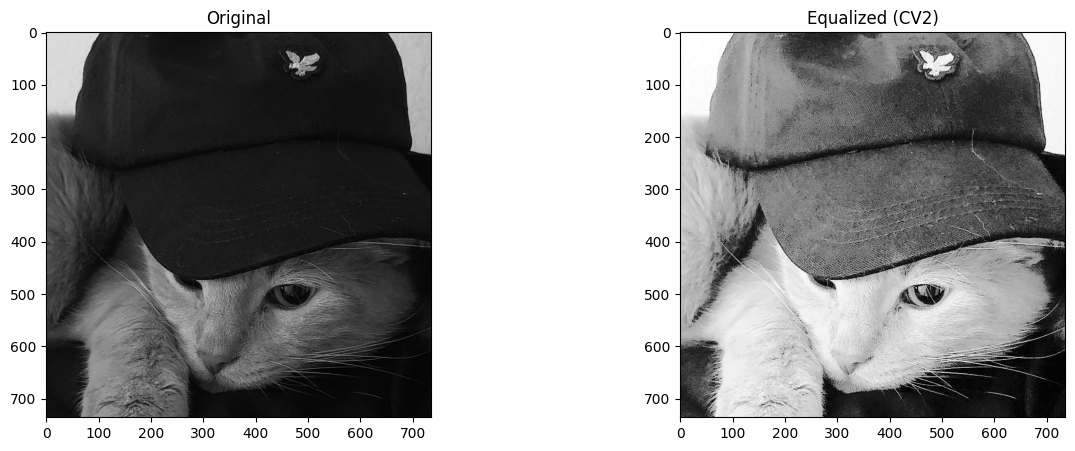

In [10]:
def histogram_equalization_cv2(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    return equalized, gray

print("Tugas 6 : Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?")
eq_cv2, gray_cv2 = histogram_equalization_cv2(lena_lc)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(gray_cv2, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(eq_cv2, cmap='gray')
plt.title('Equalized (CV2)')
plt.show()

Tugas 7 : Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini!


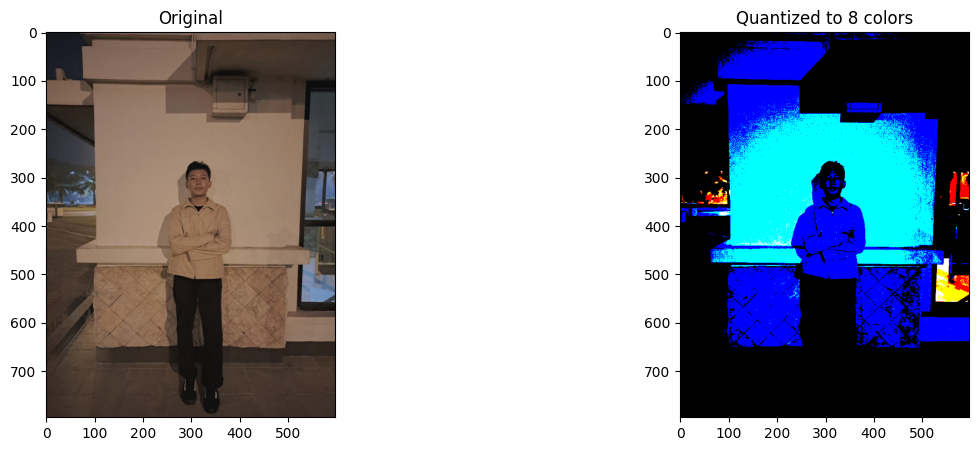

In [11]:
def quantize_to_8_colors(image):
    # Define the 8 colors
    colors = np.array([[0, 0, 0],     # Black
                       [0, 255, 0],   # Green
                       [255, 255, 0], # Yellow
                       [0, 0, 255],   # Blue
                       [0, 255, 255], # Cyan
                       [255, 0, 255], # Magenta
                       [255, 0, 0],   # Red
                       [255, 255, 255]]) # White

    pixels = image.reshape(-1, 3)
    quantized = np.zeros_like(pixels)

    for i, pixel in enumerate(pixels):
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        closest_color = colors[np.argmin(distances)]
        quantized[i] = closest_color

    return quantized.reshape(image.shape)

print("Tugas 7 : Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini!")
quantized = quantize_to_8_colors(lena)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122)
plt.imshow(quantized)
plt.title('Quantized to 8 colors')
plt.show()

Tugas 8 : Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! 


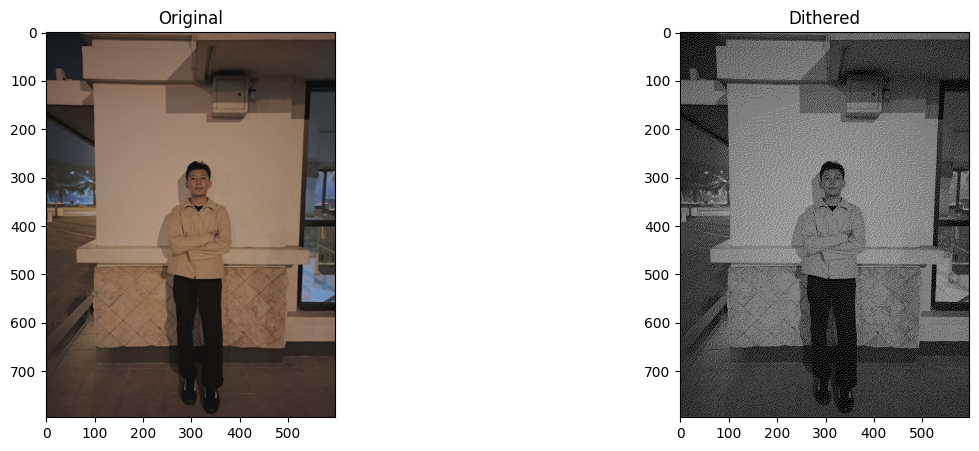

In [12]:
def floyd_steinberg_dithering(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    height, width = image.shape
    dithered = np.copy(image).astype(float)

    for y in range(height-1):
        for x in range(1, width-1):
            old_pixel = dithered[y, x]
            new_pixel = np.round(old_pixel / 255.0) * 255
            dithered[y, x] = new_pixel
            error = old_pixel - new_pixel

            dithered[y, x+1] += error * 7/16
            dithered[y+1, x-1] += error * 3/16
            dithered[y+1, x] += error * 5/16
            dithered[y+1, x+1] += error * 1/16

    return dithered.astype(np.uint8)

print("Tugas 8 : Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! ")
dithered = floyd_steinberg_dithering(lena)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122)
plt.imshow(dithered, cmap='gray')
plt.title('Dithered')
plt.show()

Tugas 9 : Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


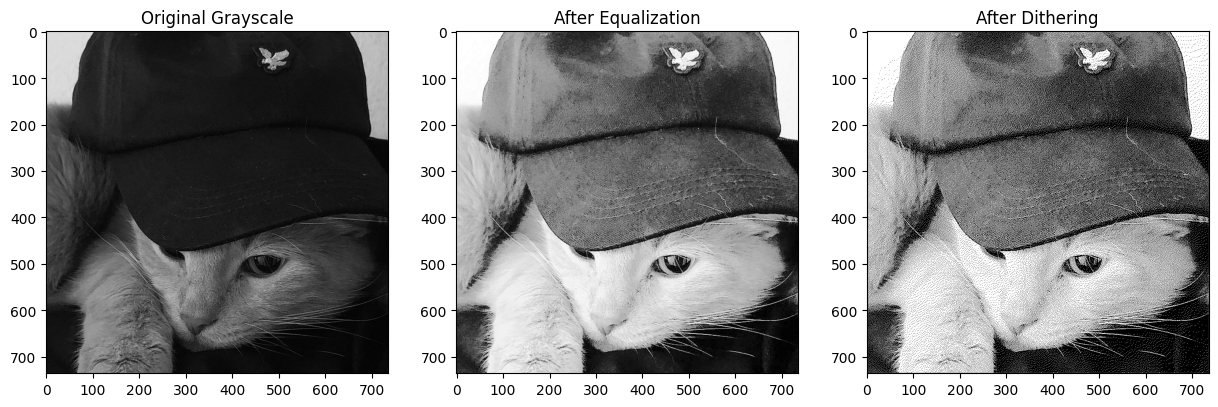

In [13]:
print("Tugas 9 : Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!")
gray_lc = cv2.cvtColor(lena_lc, cv2.COLOR_BGR2GRAY)
equalized_lc = cv2.equalizeHist(gray_lc)
dithered_lc = floyd_steinberg_dithering(equalized_lc)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(gray_lc, cmap='gray')
plt.title('Original Grayscale')
plt.subplot(132)
plt.imshow(equalized_lc, cmap='gray')
plt.title('After Equalization')
plt.subplot(133)
plt.imshow(dithered_lc, cmap='gray')
plt.title('After Dithering')
plt.show()